# CS464 Introduction to Machine Learning Homework 2 Question 1 - PCA

In [4]:
import cv2
import glob
from matplotlib import pyplot as plt
import numpy as np

ModuleNotFoundError: No module named 'cv2'

In [2]:
#define PCA function
def PCA(eigenvalues, eigenvectors, k):
    #argsort the eigenvalues in descending order
    eigvals_ind = np.argsort(eigenvalues)[::-1]
    #sort the eigenvalues and eigenvectors accordingly
    eigenvalues = eigenvalues[eigvals_ind]
    eigenvectors = eigenvectors[:,eigvals_ind]
    #select k biggest eigenvectors
    eigfcs = eigenvectors[:,:k]
    #get the transpose of the eigenmatrix
    eigfcs = eigfcs.T
    return eigfcs

In [3]:
#define the function to project the eigenmatrix into the image space
def reconstruct(data_mn, eigfcs, mean):
    #data==D, eigenfaces==E
    #reconstructed_data = (D*E')*E + mean
    proj = np.matmul(data_mn,eigfcs.T)
    proj = np.matmul(proj,eigfcs) + mean
    return proj

In [4]:
#read dataset
images = [cv2.imread(file,cv2.IMREAD_UNCHANGED) for file in glob.glob('lfwdataset/*.pgm')]

In [5]:
#set dimensions of the data
data_num = 1000
dim = 64

In [6]:
#flatten the images and convert the images into a 1000x4096 data matrix
row_images = np.arange(4096*1000).reshape(data_num,dim*dim)
for i in range(1000):
    row_images[i,:] = images[i].flatten()

In [7]:
#get the mean of each column and subtract it from the data matrix
mean = np.mean(row_images, axis=0)
data_mn = row_images - mean

In [8]:
#calculate X^TX
cov_mat = np.matmul(data_mn.T,data_mn)

In [9]:
#extract eigenvalues of X'X
#used linalg.eigh instead of linalg.eig since the scatter matrix is symmetric
eigenvalues, eigenvectors = np.linalg.eigh(cov_mat)

# Question 1.2

Percent Explained Variances
PEV for k=16  71.74538005241278
PEV for k=32  80.39070295629575
PEV for k=64  88.24575519340861
PEV for k=128  94.17002065228664
PEV for k=256  97.85694729671786
PEV for k=512  99.56732620377616
PEV for k=1024  100.00000000000007
PEV for k=2048  100.0000000000002
PEV for k=4096  100.00000000000001


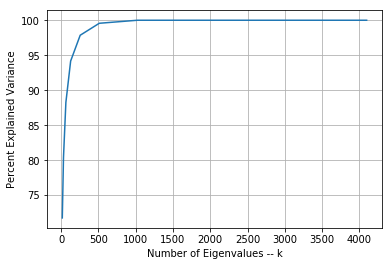

In [10]:
#explained variances
#argsort the eigenvalues in descending order
eigvals_ind = np.argsort(eigenvalues)[::-1]
#sort the eigenvalues and eigenvectors accordingly
eigenvalues = eigenvalues[eigvals_ind]
eigenvectors = eigenvectors[:,eigvals_ind]
k_vals = np.array([16, 32, 64, 128, 256, 512, 1024, 2048, 4096])
tot_var = np.sum(eigenvalues)
vas = np.zeros(k_vals.shape[0])
for ind in range(k_vals.shape[0]):
    vas[ind] = np.sum(eigenvalues[:k_vals[ind]]/tot_var*100.0)
print("Percent Explained Variances")
for i in range(vas.shape[0]):
    print("PEV for k=" + str(k_vals[i]) + " ", vas[i])
plt.plot(k_vals,vas)
plt.xlabel("Number of Eigenvalues -- k")
plt.ylabel("Percent Explained Variance")
plt.grid()
plt.show()

# Question 1.3

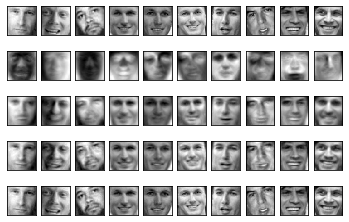

In [11]:
col_num = 10
row_num = 5
# plot originals
for ind in range(col_num):
    plt.subplot(row_num,col_num,ind+1)
    plt.imshow(row_images[ind].reshape((64,64)),cmap='gray')
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
#plot the first 6 eigenfaces
k=col_num
eigenfcs = PCA(eigenvalues,eigenvectors,k)
for ind in range(col_num):
    plt.subplot(row_num,col_num,ind+col_num+1)
    plt.imshow(eigenfcs[ind].reshape((64,64)),cmap='gray')
    plt.gca().axes.get_yaxis().set_visible(False)
    plt.gca().axes.get_xaxis().set_visible(False)
k_vals = np.array([36, 128, 512])
#plot the reconstructed faces
for ind in range(k_vals.shape[0]):
    eigfcs = PCA(eigenvalues, eigenvectors,k_vals[ind])
    rcn = reconstruct(data_mn, eigfcs, mean)
    for i in range(col_num):
        plt.subplot(row_num,col_num,col_num*(ind+2)+i+1)
        plt.imshow(rcn[i].reshape((64,64)),cmap='gray')
        plt.gca().axes.get_yaxis().set_visible(False)
        plt.gca().axes.get_xaxis().set_visible(False)
plt.show()    

## Question 1.4

In [12]:
var = 0;
count = 0;
while(var < 0.95):
    var += eigenvalues[count]/tot_var
    count += 1
print("Number of eigenfaces required: " + str(count))
print("The total explained variance: " + str(var))

Number of eigenfaces required: 145
The total explained variance: 0.9500069363721164
